# Caesar Cipher

Caesar cipher is a type of substitution cipher called `Simple Substitution Cipher` that uses a single substitution rule throughout the entire message. Each letter in the plaintext always maps to the same letter in the ciphertext.

Caesar Cipher works by shifting each letter in the message a fixed number of positions down the alphabet. For example, the message `ATTACKATDAWN` would become `BUUBDLBUEBXO` if shifted by 1. This cipher is named after Julius Caesar who reportedly used this methodology to secure messages sent to his generals during military campaigns.

> **Fun fact:** Julius Caesar was using a shift value of 3.

**Table of Values**

In [1]:
pos_a = ord("A")
pos_z = ord("Z")
pos_range = range(pos_a, pos_z + 1)

# Create the table with character values
list_values = [[chr((x + y - pos_a * 2) % 26 + pos_a) for x in pos_range] for y in pos_range]

# Print the table with formatted columns
max_col_width = max(len(col) for row in list_values for col in row) + 2
for idx, row in enumerate(list_values):
    print(" ".join([f"{val:^{max_col_width}}" for val in row]), f"\t(shift by {idx})")

 A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z  	(shift by 0)
 B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A  	(shift by 1)
 C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A   B  	(shift by 2)
 D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A   B   C  	(shift by 3)
 E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A   B   C   D  	(shift by 4)
 F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A   B   C   D   E  	(shift by 5)
 G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A   B   C   D   E   F  	(shift by 6)
 H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z   A   B   C   D   E   F   G  	(shift by 7)
 I   J   K   L   M   N   O   P   Q   R   S   T   U   V  

## Procedures

### Encryption Function

Let:
- $S$ be the set of $\{0,1,2,3 \ldots 25\}$ representing the alphabet characters with `A` = 0.
- $P$ be the plaintext represented in numerical format with `A` = 0.
- $k$ be the shift.
- $C$ be the ciphertext represented in numerical format with `A` = 0.

Encryption function:

$\forall P_i \in P \quad \colon \quad E(P_i,k) = (P_i + k) \bmod |S| = C_i \quad \text{ such that } \quad C_0 C_1 C_2 \ldots C_n = C$

Where:
- $P_i,C_i \in \mathbb{N} = \{0,1,2,3 \ldots\}$
- $0 \leq k < |S|$

### Decryption Function

The decryption function is just the inverse of the encryption function.

Decryption function:

$\forall C_i \in C \quad \colon \quad D(C_i,k) = E(C_i, -k) = P_i \quad \text{ such that } \quad P_0 P_1 P_2 \ldots P_n = P$

In [2]:
ALPHABET_CARDINALITY = ord("Z") - ord("A") + 1

def caesar_encrypt(plaintext: str, shift: int = 3):
    """This function encrypts a message using Caesar Cipher

    Args:
        plaintext (str): The message to encrypt.
        shift (int, optional): The number of positions to shift the message. Defaults to 3.

    Returns:
        str: The ciphertext.
    """
    ciphertext = ""
    for char in plaintext:
        # Convert the character to number
        char_code = ord(char) - ord("A")
        # Perform equation logic
        new_char_code = char_code + shift
        new_char_code = new_char_code % ALPHABET_CARDINALITY
        # Convert number to character
        new_char = new_char_code + ord("A")
        new_char = chr(new_char)
        # Append to the result
        ciphertext += new_char
    return ciphertext

def caesar_decrypt(ciphertext, shift):
    """This function decrypts a message using Caesar Cipher

    Args:
        ciphertext (str): The message to decrypt.
        shift (int, optional): The number of positions to shift the message. Defaults to 3.

    Returns:
        str: The plaintext.
    """
    return caesar_encrypt(ciphertext, -shift)

# Parameters
message = "MEETATTHEDOCKSBYDAWN"
shift = 1

# Example usage of encryption and decryption functions
ciphertext = caesar_encrypt(message, shift)
plaintext = caesar_decrypt(ciphertext, shift)

# Print input and output
print(f"message:\t{message}  ( shifted by {shift})")
print(f"ciphertext:\t{ciphertext}")
print(f"plaintext:\t{plaintext}")
assert message == plaintext, "Plaintext does not match the original message."

message:	MEETATTHEDOCKSBYDAWN  ( shifted by 1)
ciphertext:	NFFUBUUIFEPDLTCZEBXO
plaintext:	MEETATTHEDOCKSBYDAWN


<details>
    <summary><strong>Notice anything odd with the implementation?</strong></summary>

    - What happens if we insert a non-alphabet character like space to the message?
    - What happens if we use different casing throughout the message?
</details>

In [3]:
# Parameters with non-alphabet characters
message = "MEET AT THE DOCKS BY DAWN?"
shift = 1

# Try to encrypt and decrypt
ciphertext = caesar_encrypt(message, shift)
plaintext = caesar_decrypt(ciphertext, shift)

# Print input and output
print(f"message:\t{message}  ( shifted by {shift})")
print(f"ciphertext:\t{ciphertext}")
print(f"plaintext:\t{plaintext}")
assert message == plaintext, "Plaintext does not match the original message."

message:	MEET AT THE DOCKS BY DAWN?  ( shifted by 1)
ciphertext:	NFFUUBUUUIFUEPDLTUCZUEBXOZ
plaintext:	MEETTATTTHETDOCKSTBYTDAWNY


AssertionError: Plaintext does not match the original message.

In [4]:
# Parameters with non-alphabet characters and varying casing
message = "Meet at the docks by dawn?"
shift = 1

# Try to encrypt and decrypt
ciphertext = caesar_encrypt(message, shift)
plaintext = caesar_decrypt(ciphertext, shift)

# Print input and output
print(f"message:\t{message}  ( shifted by {shift})")
print(f"ciphertext:\t{ciphertext}")
print(f"plaintext:\t{plaintext}")
assert message == plaintext, "Plaintext does not match the original message."

message:	Meet at the docks by dawn?  ( shifted by 1)
ciphertext:	NLLAUHAUAOLUKVJRZUIFUKHDUZ
plaintext:	MKKZTGZTZNKTJUIQYTHETJGCTY


AssertionError: Plaintext does not match the original message.

### Improved Encryption Function

Let:
- $S$ be the set of alphabet characters.
- $P$ be the plaintext represented in numerical format.
- $k$ be the shift.
- $C$ be the ciphertext represented in numerical format.

Encryption function:

$
\forall P_i \in P \quad \colon \quad E(P_i,k) =
    \begin{cases}
        \quad (P_i + k) \bmod |S|         & \quad \text{if } P_i \in S \\
        \quad P_i                         & \quad \text{otherwise}
    \end{cases}
    = C_i \quad \text{ such that } \quad C_0 C_1 C_2 \ldots C_n = C
$

Where:
- $P_i,C_i \in \mathbb{N} = \{0,1,2,3 \ldots \}$
- $0 \leq k < |S|$

### Improved Decryption Function

This is still simply the inverse of the improved encryption function.

Decryption function:

$\forall C_i \in C \quad \colon \quad D(C_i,k) = E(C_i, -k) = P_i \quad \text{ such that } \quad P_0 P_1 P_2 \ldots P_n = P$

In [5]:
ALPHABET_CARDINALITY = ord("Z") - ord("A") + 1

def caesar_encrypt_v2(plaintext: str, shift: int = 3):
    """This function encrypts a message using Caesar Cipher

    Args:
        plaintext (str): The message to encrypt.
        shift (int, optional): The number of positions to shift the plaintext. Defaults to 3.

    Returns:
        str: The ciphertext.
    """
    ciphertext = ""
    for char in plaintext:
        if char.isalpha():
            # Determine 0 position based on casing
            base_position = ord("A") if char.isupper() else ord("a")
            # Shift by k
            new_char = ord(char) + shift
            new_char = (new_char - base_position) % ALPHABET_CARDINALITY
            new_char = new_char + base_position
            ciphertext += chr(new_char)
        else:
            # Keep the character as is
            ciphertext += char
    return ciphertext

def caesar_decrypt_v2(ciphertext: str, shift: int = 3):
    """This function decrypts a message using Caesar Cipher

    Args:
        ciphertext (str): The message to decrypt.
        shift (int, optional): The number of positions to shift the message. Defaults to 3.

    Returns:
        str: The plaintext.
    """
    return caesar_encrypt_v2(ciphertext, -shift)

# Failed parameters with non-alphabet characters
message = "MEET AT THE DOCKS BY DAWN?"
shift = 1

# Try to encrypt and decrypt
ciphertext = caesar_encrypt_v2(message, shift)
plaintext = caesar_decrypt_v2(ciphertext, shift)

# Print input and output
print(f"message:\t{message}  ( shifted by {shift})")
print(f"ciphertext:\t{ciphertext}")
print(f"plaintext:\t{plaintext}")
assert message == plaintext, "Plaintext does not match the original message."

message:	MEET AT THE DOCKS BY DAWN?  ( shifted by 1)
ciphertext:	NFFU BU UIF EPDLT CZ EBXO?
plaintext:	MEET AT THE DOCKS BY DAWN?


In [6]:
# Failed parameters with non-alphabet characters and varying casing
message = "Meet at the docks by dawn?"
shift = 1

# Try to encrypt and decrypt
ciphertext = caesar_encrypt_v2(message, shift)
plaintext = caesar_decrypt_v2(ciphertext, shift)

# Print input and output
print(f"message:\t{message}  ( shifted by {shift})")
print(f"ciphertext:\t{ciphertext}")
print(f"plaintext:\t{plaintext}")
assert message == plaintext, "Plaintext does not match the original message."

message:	Meet at the docks by dawn?  ( shifted by 1)
ciphertext:	Nffu bu uif epdlt cz ebxo?
plaintext:	Meet at the docks by dawn?


In [7]:
# Complicated parameters
message = "Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves."
shift = 16

# Try to encrypt and decrypt
ciphertext = caesar_encrypt_v2(message, shift)
plaintext = caesar_decrypt_v2(ciphertext, shift)

# Print input and output
print(f"message:\t{message}  (shifted by {shift})")
print(f"ciphertext:\t{ciphertext}")
print(f"plaintext:\t{plaintext}")
assert message == plaintext, "Plaintext does not match the original message."

message:	Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves.  (shifted by 16)
ciphertext:	Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.
plaintext:	Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves.


## Cryptanalysis

**Cryptanalysis** is the process of decrypting ciphertexts without prior knowledge of the cryptosystem and the key. **Cryptosystem** are the components that make encryption possible, including the algorithm, key, and key management functions.

<details>
    <summary><strong>Have you noticed anything with the examples?</strong></summary>

    - Each plaintext character is encrypted to the same ciphertext character (e.g., all As are encrypted to Ds if the shift is 3).
    - The ciphertext and the plaintext always have the same length.
    - The key (shift) is limited to a meaningful value of 0 to 25.
</details>

**Recap of the messages in the previous examples**

In [8]:
# List of messages in the previous examples
# format: (plaintext, ciphertext)
messages = [
    ("attack at dawn", "buubdl bu ebxo"),
    ("MEETATTHEDOCKSBYDAWN", "NFFUBUUIFEPDLTCZEBXO"),
    ("MEET AT THE DOCKS BY DAWN?", "NFFU BU UIF EPDLT CZ EBXO?"),
    ("Meet at the docks by dawn?", "Nffu bu uif epdlt cz ebxo?"),
    ("Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves.", "Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.")
]

# Show as a table
print("{:<10} {:<30} {:<30}".format("Example #", "Plaintext", "Ciphertext"))
for i, (plaintext, ciphertext) in enumerate(messages):
    print("{:<10} {:<30} {:<30}".format(i + 1, plaintext, ciphertext))

Example #  Plaintext                      Ciphertext                    
1          attack at dawn                 buubdl bu ebxo                
2          MEETATTHEDOCKSBYDAWN           NFFUBUUIFEPDLTCZEBXO          
3          MEET AT THE DOCKS BY DAWN?     NFFU BU UIF EPDLT CZ EBXO?    
4          Meet at the docks by dawn?     Nffu bu uif epdlt cz ebxo?    
5          Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves. Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.


### Observations

#### Each Plaintext Character is Encrypted to the Same Ciphertext Character

Recap to the improved encryption function:

$
\forall P_i \in P \quad \colon \quad E(P_i,k) =
    \begin{cases}
        \quad (P_i + k) \bmod |S|         & \quad \text{if } P_i \in S \\
        \quad P_i                         & \quad \text{otherwise}
    \end{cases}
    = C_i \quad \text{ such that } \quad C_0 C_1 C_2 \ldots C_n = C
$

Since $k$ is constant throughout $\forall P_i \in P \colon E(P_i,k)$ operations, the addend to the value of $P_i$ is also a constant value of either $k$ or $0$. Given the addition operation is idempotent, the result of $\bmod |S|$ to the sum $P_i + k$ or $P_i + 0$ is also idempotent.

**Proof by Induction**

Let us go through several examples:

Given $P_i = 0$, $k$ = 9, and $|S| = 26$,

$\quad E(0,9) = (0 + 9) \bmod 26 = 9 \pmod{26} = 9 \quad \text{ (since } P_i = 0 \text{ and } 0 \in S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(0,9) \text{ will result in the same } 9 \text{ value.}$

Given $P_i = 1$, $k$ = 9, and $|S| = 26$,

$\quad E(1,9) = (1 + 9) \bmod 26 = 10 \pmod{26} = 10 \quad \text{ (since } P_i = 1 \text{ and } 1 \in S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(1,9) \text{ will result in the same } 10 \text{ value.}$

Given $P_i = 2$, $k$ = 9, and $|S| = 26$,

$\quad E(2,9) = (2 + 9) \bmod 26 = 11 \pmod{26} = 11 \quad \text{ (since } P_i = 2 \text{ and } 2 \in S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(2,9) \text{ will result in the same } 11 \text{ value.}$

Given $P_i = 3$, $k$ = 9, and $|S| = 26$,

$\quad E(3,9) = (3 + 9) \bmod 26 = 12 \pmod{26} = 12 \quad \text{ (since } P_i = 3 \text{ and } 3 \in S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(3,9) \text{ will result in the same } 12 \text{ value.}$

Given $P_i = 16$, $k$ = 9, and $|S| = 26$,

$\quad E(16,9) = (16 + 9) \bmod 26 = 25 \pmod{26} = 25 \quad \text{ (since } P_i = 16 \text{ and } 16 \in S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(16,9) \text{ will result in the same } 25 \text{ value.}$

Given $P_i = 17$, $k$ = 9, and $|S| = 26$,

$\quad E(17,9) = (17 + 9) \bmod 26 = 26 \pmod{26} = 0 \quad \text{ (since } P_i = 17 \text{ and } 17 \in S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(17,9) \text{ will result in the same } 0 \text{ value.}$

Given $P_i = 26$, $k$ = 9, and $|S| = 26$,

$\quad E(26,9) = 26 \quad \text{ (since } P_i = 26 \text{ and } 26 \notin S = \{0,1,2,3 \ldots 25\} \text{)}$

$\quad \text{Doing the same calculation } E(26,9) \text{ will result in the same } 26 \text{ value.}$

In [9]:
for m in messages:
    (m_plaintext, m_ciphertext) = m
    m_printed = []
    print(f"plaintext: {m_plaintext}\t\tciphertext: {m_ciphertext}")
    for pos in range(len(m_plaintext)):
        if m_plaintext[pos].isalpha() and f"{m_plaintext[pos]}:{m_ciphertext[pos]}" not in m_printed:
            print(f"           {m_plaintext[pos]} ==> {m_ciphertext[pos]}")
            m_printed.append(f"{m_plaintext[pos]}:{m_ciphertext[pos]}")

plaintext: attack at dawn		ciphertext: buubdl bu ebxo
           a ==> b
           t ==> u
           c ==> d
           k ==> l
           d ==> e
           w ==> x
           n ==> o
plaintext: MEETATTHEDOCKSBYDAWN		ciphertext: NFFUBUUIFEPDLTCZEBXO
           M ==> N
           E ==> F
           T ==> U
           A ==> B
           H ==> I
           D ==> E
           O ==> P
           C ==> D
           K ==> L
           S ==> T
           B ==> C
           Y ==> Z
           W ==> X
           N ==> O
plaintext: MEET AT THE DOCKS BY DAWN?		ciphertext: NFFU BU UIF EPDLT CZ EBXO?
           M ==> N
           E ==> F
           T ==> U
           A ==> B
           H ==> I
           D ==> E
           O ==> P
           C ==> D
           K ==> L
           S ==> T
           B ==> C
           Y ==> Z
           W ==> X
           N ==> O
plaintext: Meet at the docks by dawn?		ciphertext: Nffu bu uif epdlt cz ebxo?
           M ==> N
           e ==> f
           t ==> u
  

#### The Ciphertext and the Plaintext Always Have the Same Length

Since all $P_i$ translates to one and only one $C_i$, it follows that $|P| = |C|$.

In [10]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


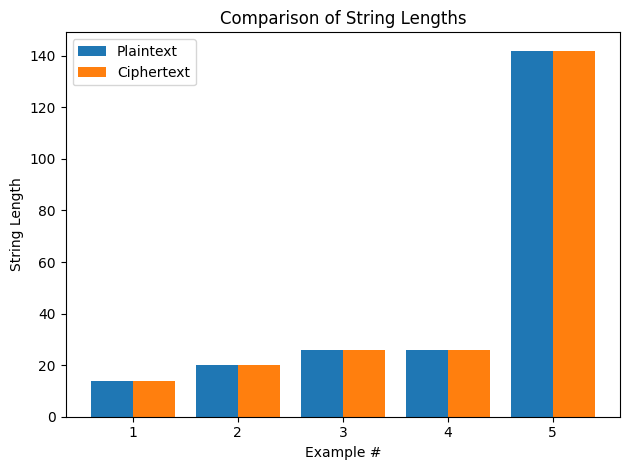

In [11]:
import matplotlib.pyplot as plt

# Extract string lengths for each example
plaintext_lengths = [len(plaintext) for plaintext, _ in messages]
ciphertext_lengths = [len(ciphertext) for _, ciphertext in messages]

# Create a bar graph with side-by-side bars
index = range(len(messages))  # Use index for x-axis labels (example numbers)
plt.bar(index, plaintext_lengths, label="Plaintext", width=0.4)
plt.bar([i + 0.4 for i in index], ciphertext_lengths, label="Ciphertext", width=0.4)

# Set labels and title
plt.xlabel("Example #")
plt.ylabel("String Length")
plt.title("Comparison of String Lengths")
plt.xticks([i + 0.2 for i in index], [i + 1 for i in range(len(messages))])  # Adjust x-axis labels for readability
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

#### The Key is Limited to a Meaningful Value of 0 to 25

Since $\bmod |S|$ reduces the result to $s \in S = \{0,1,2,3 \ldots\}$, the value of $k$ can only have a meaningful impact to the operation if $0 \leq P_i + k < |S|$ assuming $P_i \in S$ and $k \in \mathbb{N} = \{0,1,2,3 \ldots\}$.

**Proof by Induction**

Given $P_i = 0$, $k = 0$, and $|S| = 26$,

$\quad E(0,0) = (0 + 0) \bmod 26 = 0 \pmod{26} = 0$

Given $P_i = 0$, $k = 1$, and $|S| = 26$,

$\quad E(0,1) = (0 + 1) \bmod 26 = 1 \pmod{26} = 1$

Given $P_i = 0$, $k = 2$, and $|S| = 26$,

$\quad E(0,2) = (0 + 2) \bmod 26 = 2 \pmod{26} = 2$

Given $P_i = 0$, $k = 3$, and $|S| = 26$,

$\quad E(0,3) = (0 + 3) \bmod 26 = 3 \pmod{26} = 3$

Given $P_i = 0$, $k = 25$, and $|S| = 26$,

$\quad E(0,25) = (0 + 25) \bmod 26 = 25 \pmod{26} = 25$

Given $P_i = 0$, $k = 26$, and $|S| = 26$,

$\quad E(0,25) = (0 + 26) \bmod 26 = 26 \pmod{26} = 0$

Given $P_i = 0$, $k = 27$, and $|S| = 26$,

$\quad E(0,27) = (0 + 27) \bmod 26 = 27 \pmod{26} = 1$


In [12]:
message = "This is a message"

print("For shift = {0,1,25,26,27,51,52}")
for shift in (0,1,25,26,27,51,52):
    shift_ciphertext = caesar_encrypt_v2(message, shift)
    print(f"\tciphertext: {shift_ciphertext}\t\t(shift by {shift})")
print("For shift = {-1,-25,-26,-27,-51,-52}")
for shift in (-1,-25,-26,-27,-51,-52):
    shift_ciphertext = caesar_encrypt_v2(message, shift)
    print(f"\tciphertext: {shift_ciphertext}\t\t(shift by {shift})")

For shift = {0,1,25,26,27,51,52}
	ciphertext: This is a message		(shift by 0)
	ciphertext: Uijt jt b nfttbhf		(shift by 1)
	ciphertext: Sghr hr z ldrrzfd		(shift by 25)
	ciphertext: This is a message		(shift by 26)
	ciphertext: Uijt jt b nfttbhf		(shift by 27)
	ciphertext: Sghr hr z ldrrzfd		(shift by 51)
	ciphertext: This is a message		(shift by 52)
For shift = {-1,-25,-26,-27,-51,-52}
	ciphertext: Sghr hr z ldrrzfd		(shift by -1)
	ciphertext: Uijt jt b nfttbhf		(shift by -25)
	ciphertext: This is a message		(shift by -26)
	ciphertext: Sghr hr z ldrrzfd		(shift by -27)
	ciphertext: Uijt jt b nfttbhf		(shift by -51)
	ciphertext: This is a message		(shift by -52)


### Attack Methods

#### Bruteforce Attack

Bruteforce attack is a process of trying all possible keys to decrypt a given plaintext. Since Caesar Cipher has a limited set of possible keys, it is relatively easy to go through all of the keys one at a time on the ciphertext to try and get a meaningful result.

Mathematically speaking,

Let:
- $C$ is the ciphertext to break.
- $K$ is the key space (i.e., 0 to 25).
- $D(C_i,K_i)$ is the decryption function passed with the ciphertext character $C_i$ and test shift $K_i$.
- $N$ is the decrypted ciphertext.
- $P$ is the original plaintext.

We will have:

$\forall C_i \in C \text{ and } \forall K_i \in K \quad : \quad D(C_i,K_i) = N_i \quad \text{ such that } \quad N_0N_1N_2 \ldots N_n = N$

If $N$ is a recognizeable language, we can assume $N$ to be a candidate for the original plaintext $P$.

In [13]:
def caesar_bruteforce(ciphertext: str):
    """This function bruteforces a ciphertext using Caesar Cipher.

    Args:
        ciphertext (str): The ciphertext to break.

    Returns:
        str: The best match plaintext.
    """
    for key in range(26):
        decrypted_message = caesar_decrypt_v2(ciphertext, key)
        print(f"decrypted message:\t{decrypted_message}  (shifted by {key})")

# Reset messages
plaintext = "Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves."
ciphertext = "Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui."

# Test
print(f"ciphertext:\t\t{ciphertext}")
caesar_bruteforce(ciphertext)

ciphertext:		Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.
decrypted message:	Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.  (shifted by 0)
decrypted message:	Lph xi p lwxhetg dg lph xi iwt lxcs? Wt lphc'i fjxit hjgt. Wt iwdjvwi wt wtpgs p kdxrt qji paa wt rdjas wtpg lph iwt lxcs gjhiaxcv iwt atpkth.  (shifted by 1)
decrypted message:	Kog wh o kvwgdsf cf kog wh hvs kwbr? Vs kogb'h eiwhs gifs. Vs hvciuvh vs vsofr o jcwqs pih ozz vs qcizr vsof kog hvs kwbr fighzwbu hvs zsojsg.  (shifted by 2)
decrypted message:	Jnf vg n juvfcre be jnf vg gur jvaq? Ur jnfa'g dhvgr fher. Ur gubhtug ur urneq n ibvpr ohg nyy ur pbhyq urne jnf gur jvaq ehfgyvat gur yrnirf.  (shifted by 3)
decrypted message:	Ime uf m ituebqd ad ime uf ftq iuzp? Tq imez'f cgufq egdq. Tq ftagstf tq tqmdp m hauoq ngf mxx tq oagxp tqmd ime 

**Let us improve the bruteforce function by auto-detecting the output.**

We will use a third-party library to test against well-known languages with confidence score. If the confidence score is high enough, we will consider them as possible matches for those languages.

In [14]:
# The most accurate natural language detection library for Python, suitable for short text and mixed-language text
%pip install lingua-language-detector

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from lingua import Language, LanguageDetectorBuilder

# Define set of languages to test against
languages = [
    Language.ENGLISH,
    Language.DUTCH,
    Language.FRENCH,
    Language.GERMAN,
    Language.HINDI,
    Language.JAPANESE,
    Language.KOREAN,
    Language.PERSIAN,
    Language.PUNJABI,
    Language.RUSSIAN,
    Language.SPANISH,
    Language.TAGALOG,
    Language.VIETNAMESE
]

# Define detector based on the specific list of languages
detector = LanguageDetectorBuilder\
    .from_languages(*languages)\
    .with_minimum_relative_distance(0.95)\
    .build()

# Define confidence threshold
CONFIDENCE_THRESHOLD = 0.8

# Define confidence tester
def is_confident(confidence):
    """Checks if the confidence score is high enough

    Args:
        confidence: Result from detector.compute_language_confidence_values() method

    Returns:
        (boolean): Confidence flag
    """
    return confidence.value >= CONFIDENCE_THRESHOLD

print("Confidence threshold:", CONFIDENCE_THRESHOLD)
print()

# Test an english message
test1_message = "This should be reported as an ""en"" language"
test1_confidence_scores = detector.compute_language_confidence_values(test1_message)
test1_confidence_scores = filter(is_confident, test1_confidence_scores)

print("message:", test1_message)
for confidence in test1_confidence_scores:
    print(f"{confidence.language.name}: {confidence.value:.2f}")
print()

# Test a spanish message
test2_message = "Esto debe informarse como un idioma ""es"
test2_confidence_scores = detector.compute_language_confidence_values(test2_message)
test2_confidence_scores = filter(is_confident, test2_confidence_scores)

print("message:", test2_message)
for confidence in test2_confidence_scores:
    print(f"{confidence.language.name}: {confidence.value:.2f}")
print()
   
# Test a non-well-known language
test3_message = "ja'chuqtaHvIS cha' tlhInganpu'"
test3_confidence_scores = detector.compute_language_confidence_values(test3_message)
test3_confidence_scores = filter(is_confident, test3_confidence_scores)

print("message:", test3_message)
for confidence in test3_confidence_scores:
    print(f"{confidence.language.name}: {confidence.value:.2f}")

Confidence threshold: 0.8

message: This should be reported as an en language
ENGLISH: 0.95

message: Esto debe informarse como un idioma es
SPANISH: 0.87

message: ja'chuqtaHvIS cha' tlhInganpu'


In [16]:
def caesar_bruteforce_v2(ciphertext: str, language: str = ""):
    """This function bruteforces a ciphertext using Caesar Cipher.

    Args:
        ciphertext (str): The ciphertext to break.
        language (str): Known language of the plaintext.
        
    Returns:
        (dict): The decrypted message, shift, confidence score
    """
    for key in range(26):
        # Try to decrypt the message
        decrypted_message = caesar_decrypt_v2(ciphertext, key)
        
        # Predict match to well-known languages
        confidence_scores = detector.compute_language_confidence_values(decrypted_message)
        confidence_scores = list(filter(is_confident, confidence_scores))
        
        # Add as a possible match
        if len(confidence_scores) > 0:
            if language == "" or confidence_scores[0].language.name == language:
                return (decrypted_message, key, confidence_scores[0].value)

# Test
attack = caesar_bruteforce_v2(ciphertext, "ENGLISH")
print(f"ciphertext:\t\t{ciphertext}")
print(f"decrypted message:\t{attack[0]}")
print(f"shift:\t\t\t{attack[1]}")
print(f"confidence score:\t{attack[2]:0.2f}")

ciphertext:		Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.
decrypted message:	Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves.
shift:			16
confidence score:	0.98


#### Frequency Analysis

Frequency Analysis is an attack that analyzes the frequency of letters in the ciphertext to guess the shift value. Each language has an average of frequency of letters appearing in all media.

**Frequency Distribution for English Alphabet**

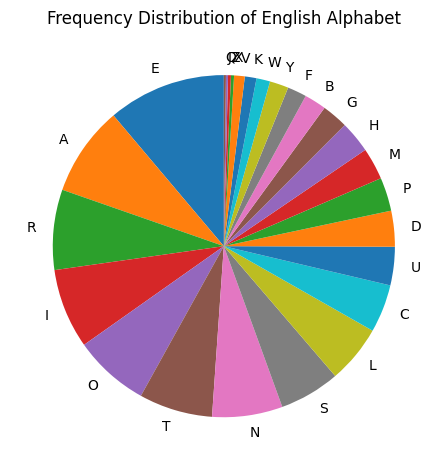

In [17]:
import numpy as np

FREQUENCY_ENGLISH = {
    "E": 0.111607, "A": 0.084966, "R": 0.075809, "I": 0.075448, "O": 0.071635,
    "T": 0.069509, "N": 0.066544, "S": 0.057351, "L": 0.054893, "C": 0.045388,
    "U": 0.036308, "D": 0.033844, "P": 0.031671, "M": 0.030129, "H": 0.030034,
    "G": 0.024705, "B": 0.020720, "F": 0.018121, "Y": 0.017779, "W": 0.012899,
    "K": 0.011016, "V": 0.010074, "X": 0.002902, "Z": 0.002722, "J": 0.001965,
    "Q": 0.001962
}

# 
pie_chart_y = np.array(list(FREQUENCY_ENGLISH.values()))
pie_chart_labels = list(FREQUENCY_ENGLISH.keys())

plt.title("Frequency Distribution of English Alphabet")
plt.pie(pie_chart_y, labels = pie_chart_labels, startangle = 90)
plt.tight_layout()
plt.show() 

Mathematically speaking,

Let:
- $C$ be the ciphertext to break.
- $l$ be the most common letter of $C$.
- $P$ be the plaintext that we want to read from $C$.
- $F$ be the set of frequency of the known language of $P$.

We calculate the distance $d$ as follows:

$\forall F_i \in F \quad \colon \quad d = |l - F_i|$

We use the distance $d$ as our shift $k$:

$\forall C_i \in C \quad \colon \quad D(C_i,d) = N_i \quad \text{ such that } \quad N_0 N_1 N_2 \ldots N_n = N$

If $N$ is a recognizeable language, we can assume $N$ to be a candidate for the original plaintext $P$.

In [18]:
def caesar_frequency_analysis(ciphertext):
    """This function performs frequency analysis to the ciphertext using Caesar Cipher

    Args:
        ciphertext (str): The ciphertext to break.

    Returns:
        (dict): The decrypted message, shift, confidence score
    """
    # Uppercase ciphertext for standard comparison
    ciphertext_upper = ciphertext.upper()
    
    # Calculate the frequency of each letter in the ciphertext
    ciphertext_frequency = {}
    for char in ciphertext_upper:
        ciphertext_frequency[char] = ciphertext_frequency[char] + 1 if char in ciphertext_frequency else 1
    
    # Retrieve the most common letter in the ciphertext
    top_frequency = dict(sorted(ciphertext_frequency.items(), key=lambda item: item[1]))
    (top_key, _) = top_frequency.popitem()
    while not top_key.isalpha():
        (top_key, _) = top_frequency.popitem()
    
    for frequency in FREQUENCY_ENGLISH.keys():
        # Calculate the distance between the common letter and the current frequency to test
        distance = ord(top_key) - ord(frequency) + 1
        
        # Try to decrypt the message
        decrypted_message = caesar_decrypt_v2(ciphertext, distance)
        
        # Predict match to well-known languages
        confidence_scores = detector.compute_language_confidence_values(decrypted_message)
        confidence_scores = list(filter(is_confident, confidence_scores))
        
        # Add as a possible match
        if len(confidence_scores) > 0:
            if confidence_scores[0].language.name == "ENGLISH":
                return (decrypted_message, distance, confidence_scores[0].value)

# Test
attack = caesar_frequency_analysis(ciphertext)
print(f"ciphertext:\t\t{ciphertext}")
print(f"decrypted message:\t{attack[0]}")
print(f"shift:\t\t\t{attack[1]}")

ciphertext:		Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.
decrypted message:	Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves.
shift:			16


#### Known-Plaintext Attack

Known-Plaintext Attack is an attack possible if we have a portion of the plaintext that corresponds to a part of the ciphertext. We calculate the distance between the ciphertext character with the corresponding known plaintext character.

Mathematically speaking,

Let:
- $C$ be the ciphertext to break.
- $P$ be the original plaintext.
- $P_{i \ldots j}$ be the known portion of $P$.

We calculate the distance $d$ as follows:

$\forall C_{i \ldots j} \subseteq C \quad \text{ and } \quad P_{i \ldots j} \subseteq P \colon$

$d_{i \ldots j} =
    \begin{cases}
        \quad |S| - P_{i \ldots j} + C_{i \ldots j}       & \quad \text{ if } P_{i \ldots j} > C_{i \ldots j} \\
        \quad C_{i \ldots j} - P_{i \ldots j}             & \quad \text{ otherwise}
    \end{cases}
\quad \text{ such that } \quad d_i = \ldots = d_j = d$

Where:
- $i,j \in \mathbb{Z^+} = \{1,2,3...\}$
- $i < j$

We use the distance $d$ as our shift $k$:

$\forall C_i \in C \quad \colon \quad D(C_i,d) = N_i \quad \text{ such that } \quad N_0 N_1 N_2 \ldots N_n = N$

We can assume that the result is the original plaintext $P$.

In [19]:
import random

def random_substring(string:str):
    """Creates a random subset of a string

    Args:
        string (str): Original string to dissect

    Returns:
        str: Random substring
    """
    # Generate random start index within string bounds (0 to len(text) - 1)
    start = random.randint(0, len(string) - 1)

    # Generate random non-zero length to avoid empty substrings
    # Ensures length <= remaining characters to avoid IndexError
    length = random.randint(5, len(string) - start)
    
    # Ensure the first character is an alphabet
    substring = string[start : start + length]
    return substring if substring[0].isalpha() else random_substring(string)

def caesar_known_plaintext_attack(ciphertext:str, known_plaintext:str):
    """This function performs a known-plaintext attack to the ciphertext using Caesar Cipher

    Args:
        ciphertext (str): The ciphertext to break.
        known_plaintext (str): The known plaintext.

    Returns:
        (dict): The decrypted message, shift
    """
    ciphertext_len = len(ciphertext)
    known_plaintext_len = len(known_plaintext)
    
    for pos_cipher in range(ciphertext_len - known_plaintext_len + 1):
        if not ciphertext[pos_cipher].isalpha():
            continue
    
        distance = -1
        for pos_plain in range(known_plaintext_len):
            # Skip character if noth are non-alphabets
            if not ciphertext[pos_cipher + pos_plain].isalpha() and not known_plaintext[pos_plain].isalpha():
                continue
            
            # Skip iteration if either is non-alphabet
            if not ciphertext[pos_cipher + pos_plain].isalpha() or not known_plaintext[pos_plain].isalpha():
                distance = -1
                break
            
            # Convert character to number
            ciphertext_ord = ord(ciphertext[pos_cipher + pos_plain])
            plaintext_ord = ord(known_plaintext[pos_plain])
            
            # Calculate distance
            if (plaintext_ord > ciphertext_ord):
                current_distance = 26 - plaintext_ord + ciphertext_ord
            else:
                current_distance = ciphertext_ord - plaintext_ord
            
            # Set the distance to the current value if first time
            if distance == -1:
                distance = current_distance
            
            # Make sure the distance and current value are the same
            if distance != current_distance:
                distance = -1
                break
    
        # When the distance is the same for all alphabet characters
        if distance > -1:
            # Try to decrypt the message
            decrypted_message = caesar_decrypt_v2(ciphertext, distance)
            return (decrypted_message, distance)
    
    return (None, None)

# Test
random_plaintext = random_substring(plaintext)
attack = caesar_known_plaintext_attack(ciphertext, random_plaintext)
print(f"ciphertext:\t\t{ciphertext}")
print(f"known plaintext:\t{random_plaintext}")
print(f"decrypted message:\t{attack[0]}")
print(f"shift:\t\t\t{attack[1]}")

ciphertext:		Mqi yj q mxyifuh eh mqi yj jxu mydt? Xu mqid'j gkyju ikhu. Xu jxekwxj xu xuqht q leysu rkj qbb xu sekbt xuqh mqi jxu mydt hkijbydw jxu buqlui.
known plaintext:	sper or was it the wind? He wasn't quite sure. He thought he heard a voice b
decrypted message:	Was it a whisper or was it the wind? He wasn't quite sure. He thought he heard a voice but all he could hear was the wind rustling the leaves.
shift:			16


## Activity: Et tu, Julius?

Rain lashed against the opulent walls of the general's quarters, a stark contrast to the storm raging outside. A cloaked figure materialized from the shadows, pressing a worn scroll into his hand. "For Caesar," Varro rasped, voice barely audible over the howling wind. "A matter of utmost urgency." Before the general could even react, Varro melted back into the storm-drenched night.

A sense of foreboding settled over the seasoned general. The scroll, though adorned with Caesar's seal, held none of the usual intricate ciphers. Instead, a series of crude symbols stared back at him – a simple substitution cipher, a stark departure from Caesar's usual methods. A cold sweat prickled the general's skin. This reeked of desperation, of someone close to the enemy risking everything to warn them.

The code reads:
```
Uz pqoqy puqnge, budmfmq aduqzfqy hqzuqzf. Odai radymfuaz gfqzfqe abbgszmngzf. Fqdfumy xufqdmy zayuzue fgu aefqzpqzpa oaszaeoq.
```

He spent the night hunched over a flickering lamp, deciphering the amateurish code. The code revealed a chillingly clear message. An attack is coming. Sleep was a distant concept. The general knew the weight of Rome rested on his shoulders. Under the guise of a routine inspection, he requisitioned the fastest horse and raced for the capital, the fate of the Empire a heavy cloak around his broad frame.

Nine days later, a lavish banquet thrummed with music and laughter. Caesar, his face an unreadable mask, scanned the room. The general, standing discreetly near the dais, caught a flicker of movement across the hall. It was Varro, shrouded in a dark cloak, his eyes searching frantically.

Without drawing attention, the general reached into his tunic and subtly scratched the base of his thumb on something creating a pre-arranged signal stated in the coded message. It meant, "The message is received. We are prepared."

Varro, a flicker of relief crossing his features, offered a barely perceptible nod before disappearing back into the throng. The fate of Rome hung in the balance, but for a fleeting moment, a silent exchange between two soldiers served as a flicker of hope amidst the approaching storm.

What is the signal used by the guard?